In [ ]:
Praktikum KNN 4 APR

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## import data

In [20]:
#Import Data
data = pd.read_csv('E:/irish.csv')

In [21]:
data.info

<bound method DataFrame.info of      Sepal length   Sepal Width   Petal Length   Petal Width         species
0             5.1           3.5            1.4           0.2     Iris-setosa
1             4.9           3.0            1.4           0.2     Iris-setosa
2             4.7           3.2            1.3           0.2     Iris-setosa
3             4.6           3.1            1.5           0.2     Iris-setosa
4             5.0           3.6            1.4           0.2     Iris-setosa
5             5.4           3.9            1.7           0.4     Iris-setosa
6             4.6           3.4            1.4           0.3     Iris-setosa
7             5.0           3.4            1.5           0.2     Iris-setosa
8             4.4           2.9            1.4           0.2     Iris-setosa
9             4.9           3.1            1.5           0.1     Iris-setosa
10            5.4           3.7            1.5           0.2     Iris-setosa
11            4.8           3.4            1

In [22]:
data.head()

,Sepal length,Sepal Width,Petal Length,Petal Width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


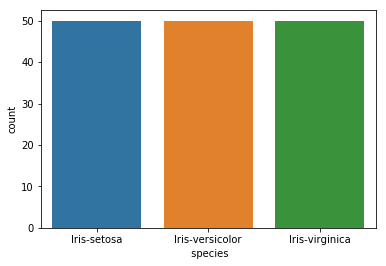

In [24]:
sns.countplot(x=data[' species'])
plt.show()

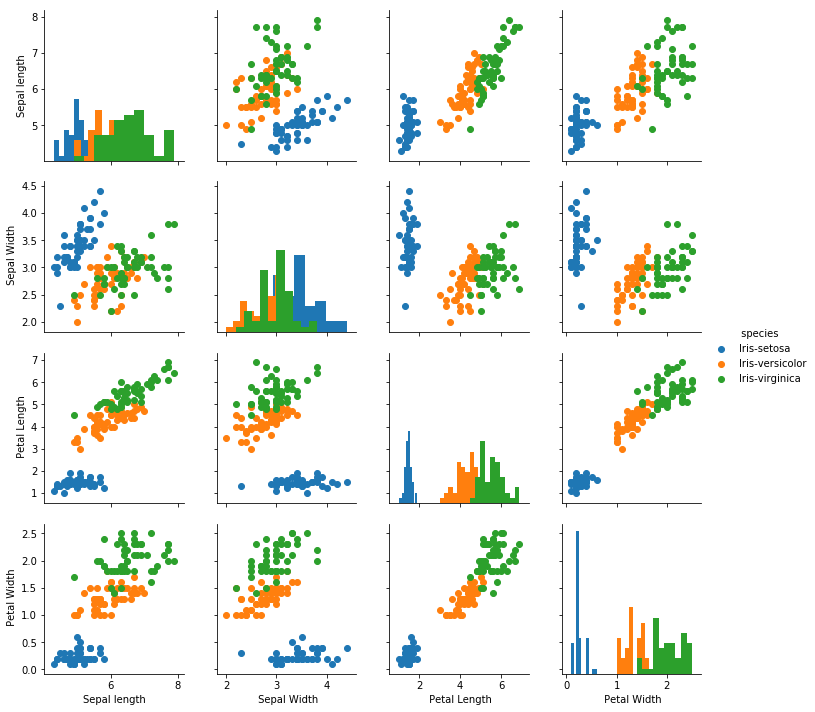

In [25]:
g = sns.PairGrid(data, hue=" species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

## Modeling
### Encode Labels

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
data['target'] = LabelEncoder().fit_transform(data[' species'])

In [28]:
data.head()

,Sepal length,Sepal Width,Petal Length,Petal Width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [29]:
data.tail()

,Sepal length,Sepal Width,Petal Length,Petal Width,species,target
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = data['target']
X = data.drop([' species','target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

### kNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
knn.score(X_train, y_train)

0.9833333333333333

### Test Set Prediction

In [37]:
y_predict = knn.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]


In [40]:
species = data[' species'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=species, index=species)

In [41]:
conf_matrix_df

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,5,1
Iris-virginica,0,0,11


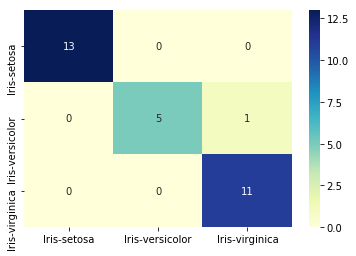

In [42]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [43]:
accuracy_score(y_test, y_predict)

0.9666666666666667